***Подготовим файлы для сборки генома***

1. Проведем анализ качества прочтений, используя fastqc:   
все результаты загружены в папку **fast_raw**

2. Проанализируем первый файл - *fastqc_raw/.ipynb_checkpoints/illumina_reads_R1_001_fastqc-checkpoint.html*:   
Наблюдаем предупреждения и ошибки в разделах:

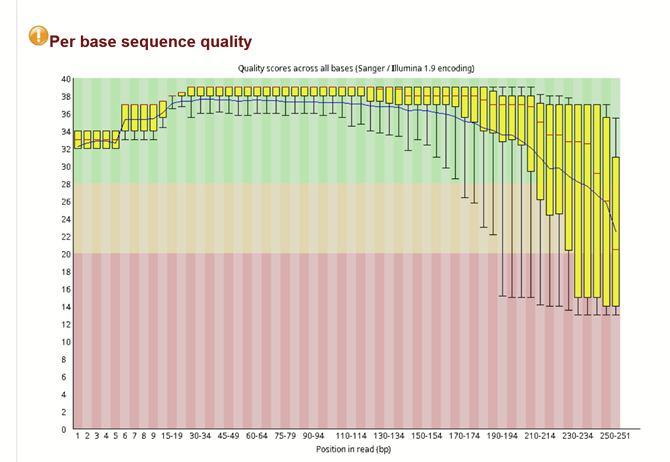

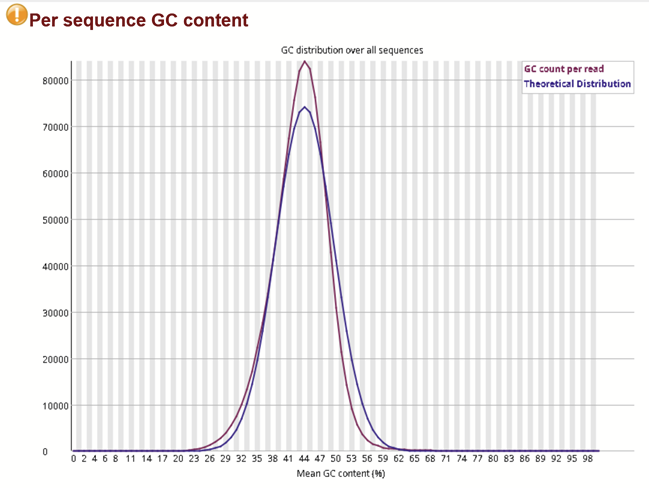

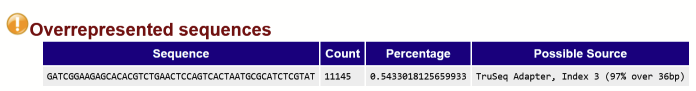

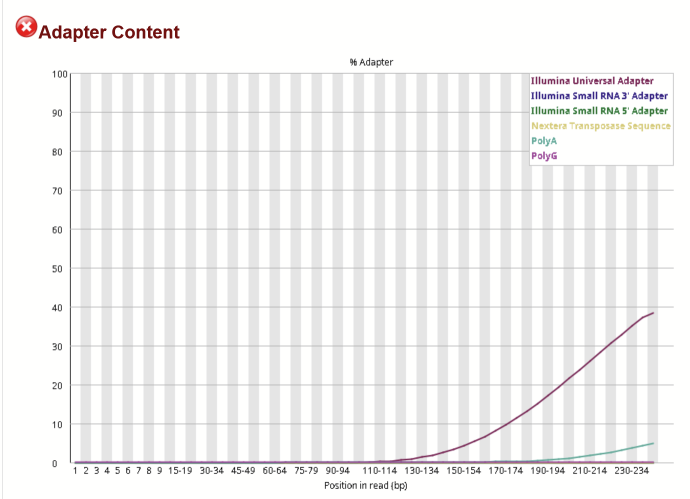

Видим, что ближе к конечным позициями наблюдается резкое падение качества. Боксплоты становятся все больше и спускаются в красную зону, а медиана также значительно снижается. Это означает, что к концу прочтений значительная часть оснований имеет низкую оценку качества. Для решения этой проблемы необходимо провести обрезание последовательности с конца.
   
Также проблема видна с GC составом: фактический пик находится выше теоретически ожидаемого.      
   
Затем наблюдаем, что в наших ридах есть адаптеры (TruSeq Adapter, Index 3), который находится в 0.54% всех прочтений. К тому же Adapter Content показывает наличие Illumina Universal Adapter и Illumina Small RNA 5' Adapter, которые необходимо обрезать для дальнейшкго анализа

Проанализируем второй файл - *fastqc_raw/.ipynb_checkpoints/illumina_reads_R2_001_fastqc-checkpoint.html*:   
Наблюдаем предупреждения и ошибки в разделах:

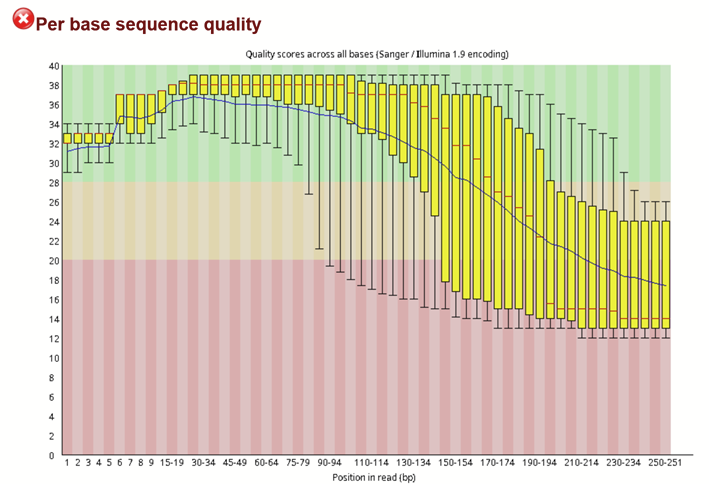

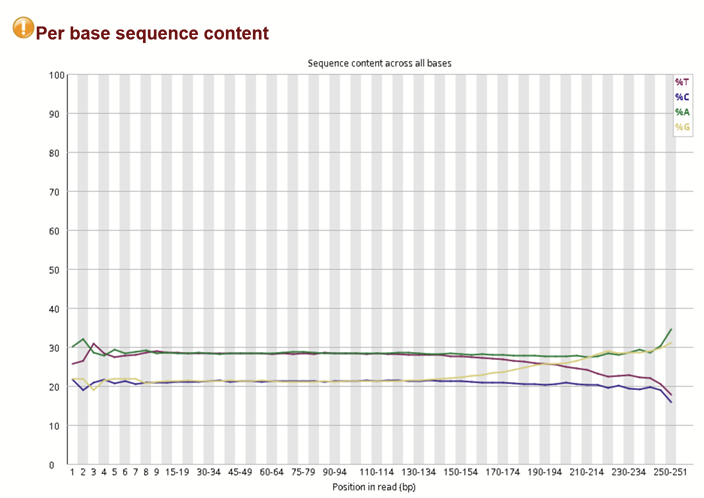

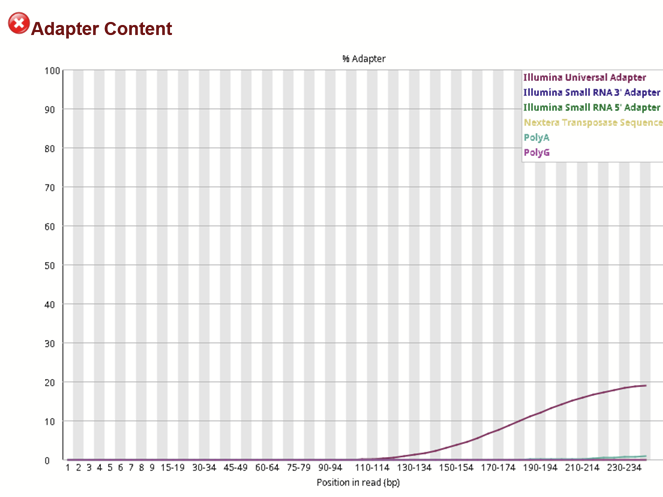

Наблюдаем, что уже с порядка 140-ой позиции наблюдается падение качества. Нужно будет обрезать конечную часть ридов
   
В Per base sequence content наблюдаем, что ближе к концу ридов содержание A и G возрастает, а T и C уменьшается. Такого быть не должно, надо будет в конце обрезать  
  
И, что логично, наблюдаем в конце рида Illumina Universal Adapter, который надо будет убрать

3. Обрежем адаптеры при помощи *trimmomatic*.   
Для этого создадим bash-скрипт *trimm.sh*

Результаты тримминга:
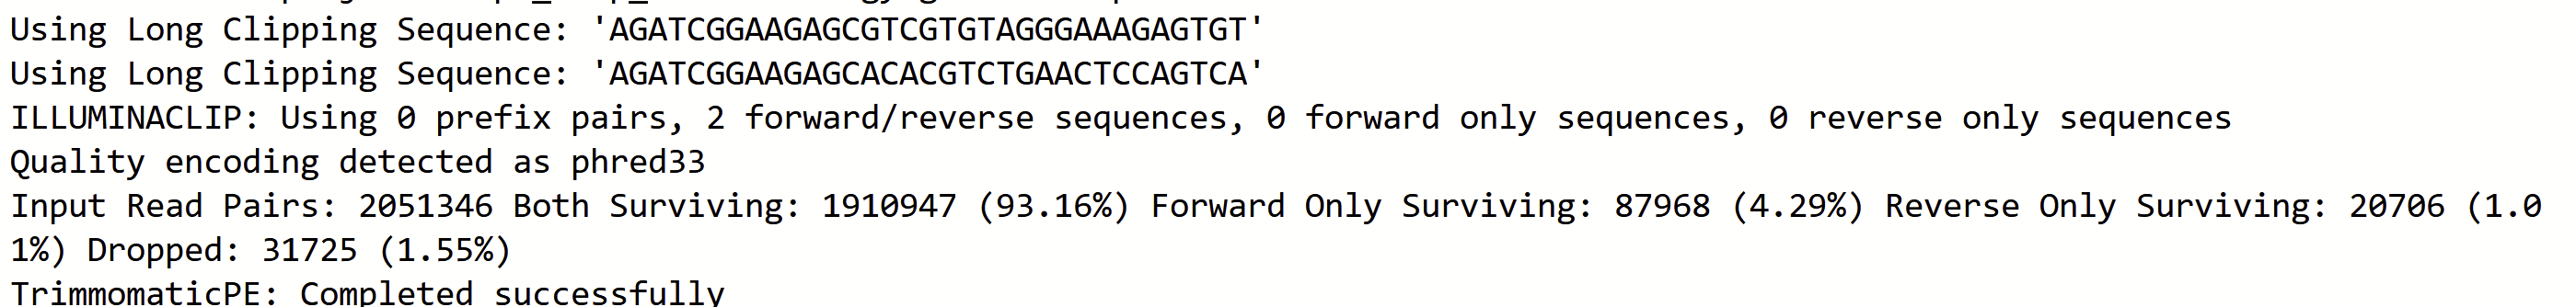

В целом, результаты тримминга выглядят очень хорошо. Trimmomatic успешно удалил адаптеры и отфильтровал прочтения с низким качеством, при этом сохранив большую часть данных.

4. Снова проведем анализ при помощи *fastqc*.  
В файле *fastqc_trimmed/trimmed_R1_paired_fastqc.html* мы получаем предупреждение на графике Sequence Length Distribution, связанное с тем, что большинство ридов имеют длину около 250 bp. Это связано с тем, что после удаления адаптеров и низкокачественных оснований большая часть ридов сохранила исходную длину. Остальная часть модулей программы не показывает предупреждений или ошибок   
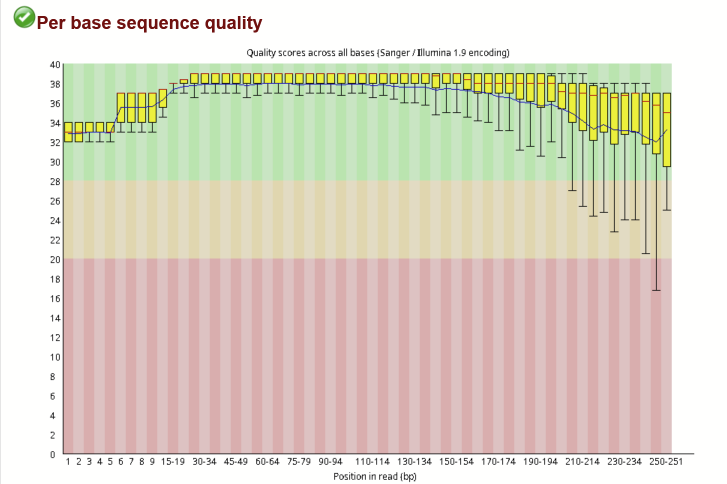

В файле *fastqc_trimmed/trimmed_R2_paired_fastqc.html* мы сталкиваемся с большим числом предупреждений и ошибок, причем в конце ридов уже нет проблем с качеством  

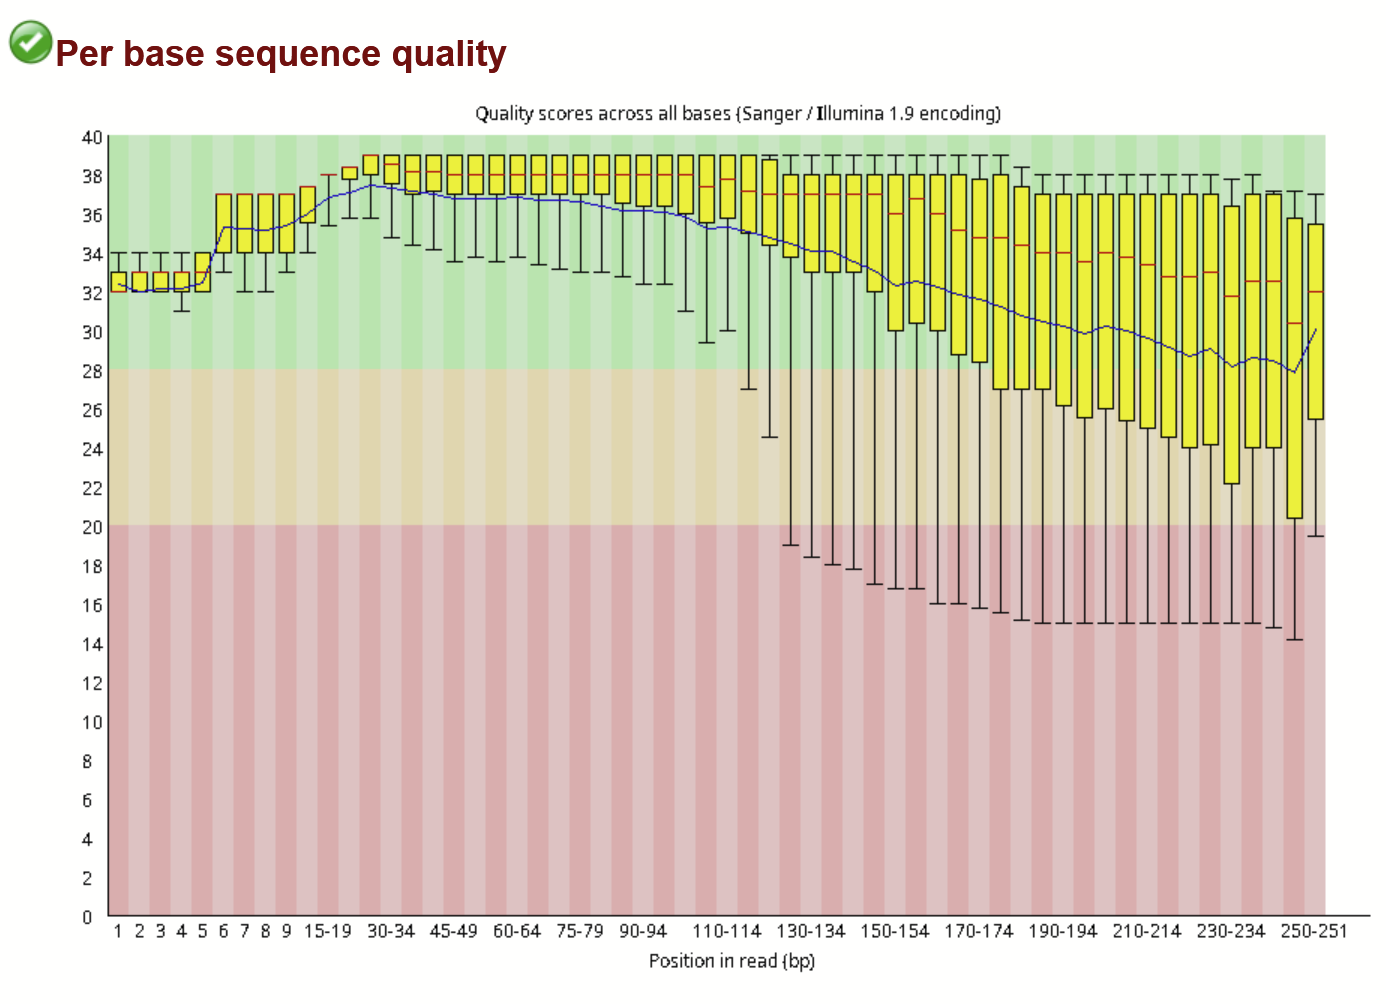

Качество ридов на большей части длины улучшилось, но вместе с этим появились локальные дефекты по тайлам (Per tile sequence quality - ошибка), небольшие отклонения в базовом составе (Per base sequence  - предупреждение) и аналогично файлу *fastqc_trimmed/trimmed_R1_paired_fastqc.html* предупреждение о распределении длин последовательностей:

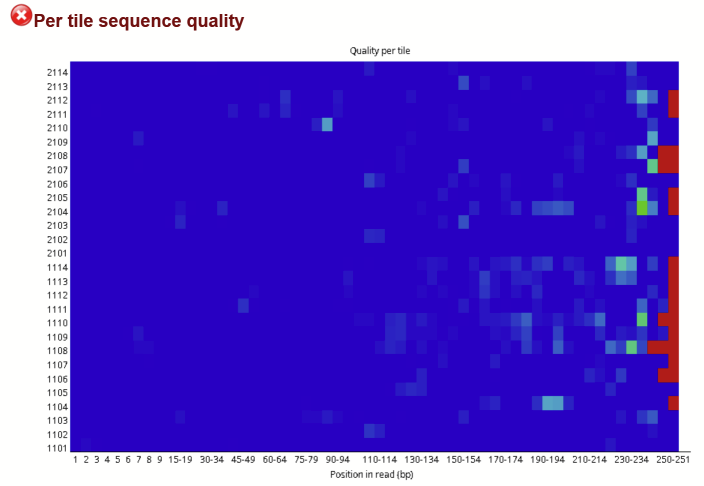

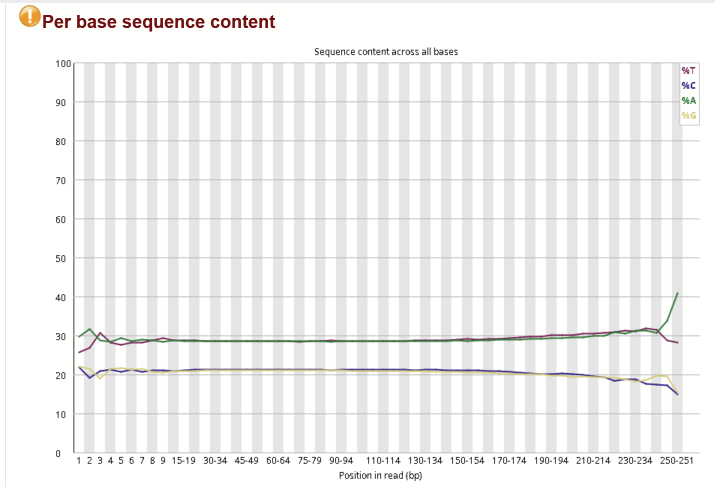

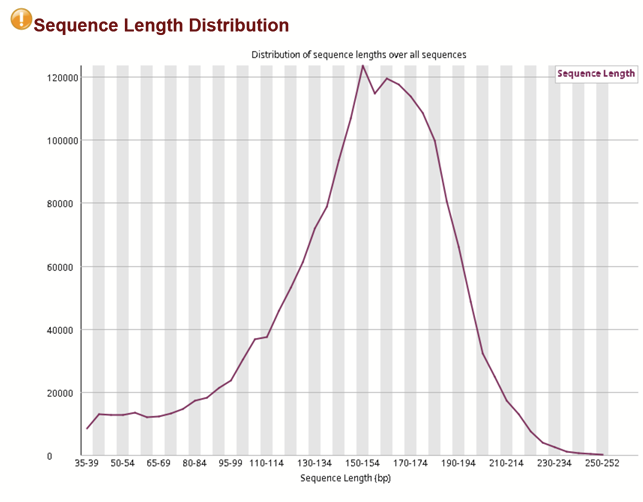

Тримминг эффективно удалил части прочтений, где качество было низким, но ошибка в Per tile sequence quality появилась. Предположу, что в сырых данных эта проблема размазывалась из-за того, что хорошие данные тоже присутствовали, когда мы удалили плохие концы, проблема стала более явной. Т.к. это не проблема отдельных нуклеотидов в ридах, а с самим процессом секвенирования
  
График в Per base sequence content выглядит на конце лучше, чем до тримминга (в начале тоже видны улучшения), но предупреждение осталось, что может быть связано уже с проблемами постановки эксперимента  

Разная длина прочтений связана с тем, что большая часть ридов на концах была плохого качества, поэтому в области более коротких,150-170 bp последовтаельностей, наблюдаем пик